In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#https://drive.google.com/file/d/1sCCEmEKjHyH0iaoNwLYYDI5QyW9zeVlL/view?usp=sharing



fileDownloaded = drive.CreateFile({"id":"1sCCEmEKjHyH0iaoNwLYYDI5QyW9zeVlL"})

fileDownloaded.GetContentFile("data.pkl")

In [ ]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import numpy as np
!pip install kneed
from kneed import KneeLocator
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pickle
dataset = pickle.load(open("data.pkl", "rb"))
#https://huggingface.co/datasets/amazon_us_reviews#data-fields

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
sw.extend(['many', 'good', 'like', 'liked', 'well', 'great', 'get', 'also', 'really', 'very', 'put'])
dataset = pickle.load(open("data.pkl", "rb"))
nltk.download('punkt')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# Remove custom stopwords
def clean_text(txt_in):
    import re
    clean = re.sub('[^A-Za-z0-9]+', " ", txt_in).lower().strip()
    return clean

def rem_sw(var):
    my_test = [word for word in var.split() if word not in sw]
    my_test = ' '.join(my_test)
    return my_test

# Remove words less than 3 characters
def length_fun(var):
    tmp_txt = [word for word in var.split() if len(word) > 2]
    tmp_txt = ' '.join(tmp_txt)
    return tmp_txt

# Stem text
def stem_fun(var):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    tmp_txt = [stemmer.stem(word) for word in var.split()]
    tmp_txt = ' '.join(tmp_txt)
    return tmp_txt

# Lemmatize the text
    nltk.download('punkt')
    nltk.download('wordnet')
    wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_fun(var):
    tmp_txt = [wordnet_lemmatizer.lemmatize(word) for word in var.split()]
    tmp_txt = ' '.join(tmp_txt)
    return tmp_txt


def review_sentiment(df):
    if df['star_rating'] >= 4:
        return 'Positive'
    elif df['star_rating'] == 3:
        return 'Neutral'
    elif df['star_rating'] <= 2:
        return 'Negative'

dataset['review_body_clean_2'] = dataset['review_body_clean'].apply(rem_sw).apply(length_fun).apply(lemmatize_fun).apply(rem_sw)
dataset['review_headline_clean'] = dataset['review_headline'].apply(clean_text).apply(rem_sw).apply(length_fun).apply(lemmatize_fun).apply(rem_sw)
#.str.split() 

dataset['word_count_body'] = dataset['review_body'].apply(lambda x: len(str(x).split()))
dataset['word_count_headline'] = dataset['review_headline'].apply(lambda x: len(str(x).split()))
dataset['review_category'] = dataset.apply(review_sentiment, axis = 1)

dataset.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_category,review_body_clean,review_body_clean_2,review_headline_clean,word_count_body,word_count_headline
0,US,33605939,RGYFDX8QXKEIR,B007KO2MLO,328837464,Big Maria,Digital_Ebook_Purchase,4,0,0,0,0,Quirky,Elmore Leonard meets the cast of Sierra Madre....,2013-09-09,Positive,elmore leonard meets the cast of sierra madre ...,elmore leonard meet cast sierra madre quirky r...,quirky,24,1
1,US,34058393,R13CBGTMNV9R8Z,B005FLODDE,764276359,The Woman Who Wasn't There: The True Story of ...,Digital_Ebook_Purchase,4,1,2,0,1,The Woman Who Wasn't There,This book was very interesting. It is a true s...,2013-09-09,Positive,this book was very interesting it is a true st...,book interesting true story woman perpetrated ...,woman,47,5
2,US,39601147,R7DRFHC0F71O0,B00EA3L35O,535606445,Mary had A Sleepy Sheep,Digital_Ebook_Purchase,5,0,0,0,0,This Sleepy Sheep rocks!,I had the opportunity to review Mary had a Sle...,2013-09-09,Positive,i had the opportunity to review mary had a sle...,opportunity review mary sleepy sheep julia dwe...,sleepy sheep rock,86,4
3,US,17351407,R27LUKEXU3KBXQ,B00BL3JV50,240053004,Starstruck,Digital_Ebook_Purchase,5,1,1,0,1,Steamy and suspenseful!!!!!,What a great read! I really couldn't put this...,2013-09-09,Positive,what a great read i really couldn t put this b...,read book suspenseful twist steamy love story ...,steamy suspenseful,43,3
4,US,10463387,R1VXTPUYMNU687,B00CXU7U80,931529805,The Complete Conan Saga,Digital_Ebook_Purchase,5,1,2,0,0,Barbarians,Barbarians need love too ! Short stories work...,2013-09-09,Positive,barbarians need love too short stories work we...,barbarian need love short story work ebooks te...,barbarian,28,1


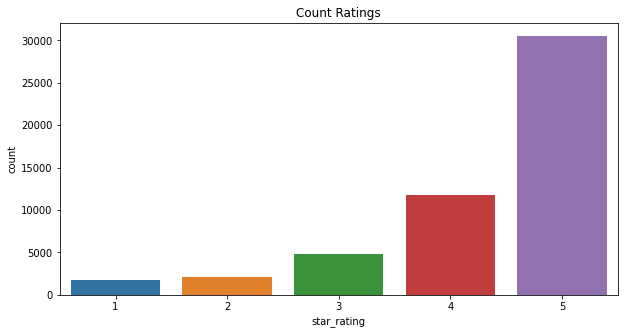

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['star_rating'])
plt.title('Count Ratings')
plt.show()

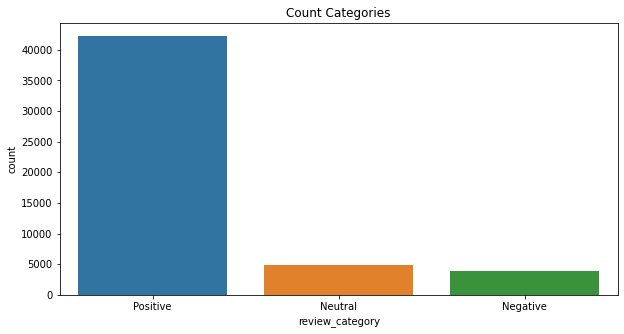

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['review_category'])
plt.title('Count Categories')
plt.show()

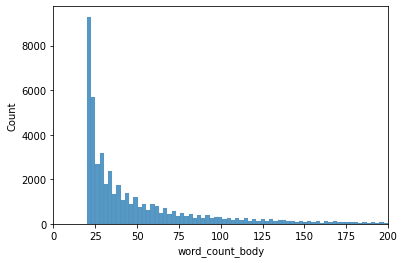

In [ ]:
fig, ax = plt.subplots()
sns.histplot(dataset["word_count_body"])
ax.set_xlim(0,200)
plt.show()

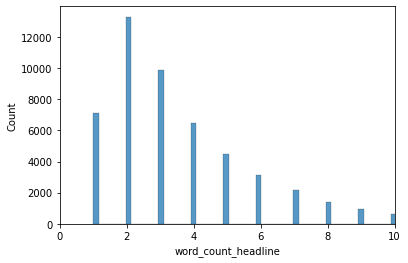

In [ ]:
fig, ax = plt.subplots()
sns.histplot(dataset["word_count_headline"])
ax.set_xlim(0,10)
plt.show()

In [ ]:
dataset.word_count_body.describe()

count    51017.000000
mean        71.880256
std        112.043237
min         20.000000
25%         24.000000
50%         36.000000
75%         71.000000
max       2623.000000
Name: word_count_body, dtype: float64

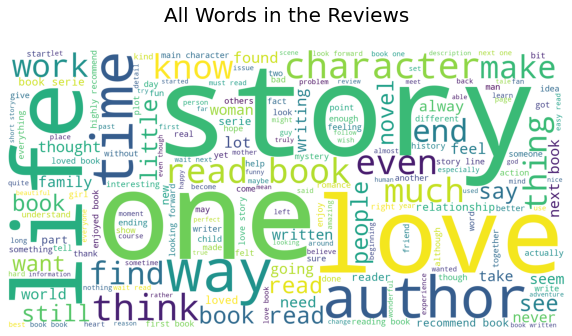

In [ ]:
#Exploratory Data Analysis
#We will start be veryfing what are the most common words used in the text reviews using a word cloud. 
rt = dataset['review_body_clean_2']
wordcloud = WordCloud(background_color='white',
                      width=1600,
                      height=800
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

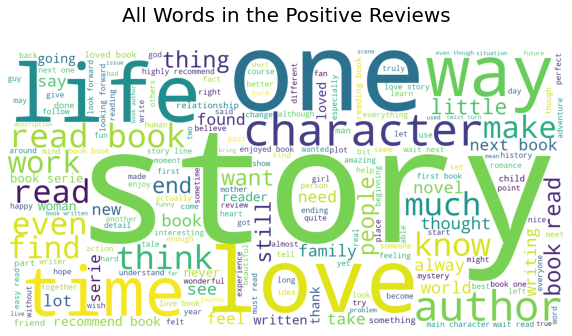

In [ ]:
#devide into positive, neutral and negative
review_pos = dataset[dataset["review_category"]=='Positive'].dropna()
rt = review_pos['review_body_clean_2']
wordcloud = WordCloud(background_color='white',
                      width=1600,
                      height=800
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('All Words in the Positive Reviews\n',size=20)
plt.axis('off')
plt.show()

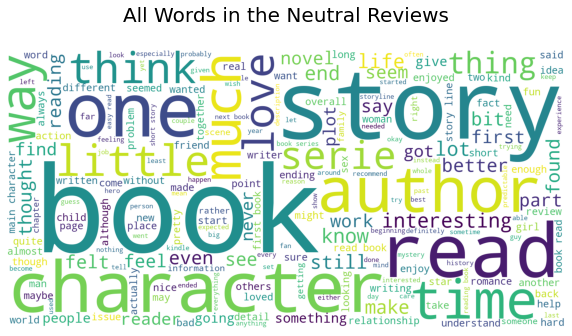

In [ ]:
#neutral
review_neu = dataset[dataset["review_category"]=='Neutral'].dropna()
rt = review_neu['review_body_clean_2']
wordcloud = WordCloud(background_color='white',
                      width=1600,
                      height=800
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('All Words in the Neutral Reviews\n',size=20)
plt.axis('off')
plt.show()

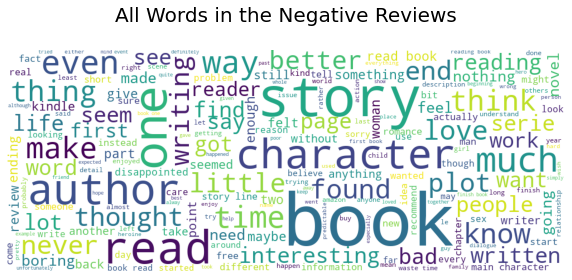

In [ ]:
#negative
review_neg = dataset[dataset["review_category"]=='Negative'].dropna()
rt = review_neg['review_body_clean_2']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('All Words in the Negative Reviews\n',size=20)
plt.axis('off')
plt.show()

In [ ]:
review_df = dataset[['review_body_clean_2','review_headline_clean','star_rating','review_category','word_count_body','word_count_headline']]
review_df.head()

,review_body_clean_2,review_headline_clean,star_rating,review_category,word_count_body,word_count_headline
0,elmore leonard meet cast sierra madre quirky r...,quirky,4,Positive,24,1
1,book interesting true story woman perpetrated ...,woman,4,Positive,47,5
2,opportunity review mary sleepy sheep julia dwe...,sleepy sheep rock,5,Positive,86,4
3,read book suspenseful twist steamy love story ...,steamy suspenseful,5,Positive,43,3
4,barbarian need love short story work ebooks te...,barbarian,5,Positive,28,1


Vader Sentiment Analysis

In [ ]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def varder_sentiment_scores(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
review_df['Vader_Sentiment_Body'] = review_df['review_body_clean_2'].apply(varder_sentiment_scores)
review_df['Vader_Sentiment_Headline'] = review_df['review_headline_clean'].apply(varder_sentiment_scores)

review_df['Vader_Analysis_Body'] = review_df['Vader_Sentiment_Body'].apply(vader_analysis)
review_df['Vader_Analysis_Headline'] = review_df['Vader_Sentiment_Headline'].apply(vader_analysis)

review_df.head(10)


Bert Sentiment Analysis

In [ ]:
#!pip install transformers
#!pip install tensorflow
#!pip install Cython
from transformers import pipeline
SentimentClassifier = pipeline("sentiment-analysis")
#https://thinkingneuron.com/sentiment-analysis-of-tweets-using-bert/

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
#example of sentiment classifier
SentimentClassifier(["I hope we get all these concepts! Its killing the neurons of our brain",
                     "We had a nice experience in this trip",
                     "Houston we have a problem"
                      ])


[{'label': 'NEGATIVE', 'score': 0.9997034668922424},
 {'label': 'POSITIVE', 'score': 0.9998235106468201},
 {'label': 'NEGATIVE', 'score': 0.9944382905960083}]

In [ ]:
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])

def FunctionBERTScore(inpText):
  return(SentimentClassifier(inpText)[0]['score'])

def BertString(df):
    if df['Bert_Analysis_Body'] == 'POSITIVE':
        return 'Positive'
    elif df['Bert_Analysis_Body'] == 'NEGATIVE':
        return 'Negative'


# Defining a function to call for the whole dataframe

#bert only evaluates the first 512 words
def trim_long(var):
  tmp_txt = [word for word in var.split()[:50]]
  tmp_txt = ' '.join(tmp_txt)
  return tmp_txt



In [ ]:
review_df['Bert_Analysis_Body'] = review_df['review_body_clean_2'].apply(trim_long)
review_df['Bert_Analysis_Body'] = review_df['Bert_Analysis_Body'].apply(FunctionBERTSentiment)
review_df['Bert_Analysis_Body'] = review_df.apply(BertString,axis =1)


In [ ]:
review_df['Bert_Sentiment_Body'] = review_df['review_body_clean_2'].apply(trim_long)
review_df['Bert_Sentiment_Body'] = review_df['Bert_Sentiment_Body'].apply(FunctionBERTScore)
#with open('file.pkl', 'wb') as file:
#    pickle.dump(review_df, file)

#from google.colab import files
#files.download('file.pkl')

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fileDownloaded = drive.CreateFile({"id":"1O582e3F49ksqS0k_1Kh8osWcUD7OFAVt"})
#https://drive.google.com/file/d/1zYjkKEIHxaQEe2x-A5GazGMRxPqpTgP6/view?usp=sharing
#https://drive.google.com/file/d/1O582e3F49ksqS0k_1Kh8osWcUD7OFAVt/view?usp=sharing
fileDownloaded.GetContentFile("file.pkl")
import pickle
review_df = pickle.load(open("file.pkl", "rb"))

review_df.head()


,review_body_clean_2,review_headline_clean,star_rating,review_category,word_count_body,word_count_headline,Vader_Sentiment_Body,Vader_Sentiment_Headline,Vader_Analysis_Body,Vader_Analysis_Headline,Bert_Analysis_Body,Bert_Sentiment_Body
0,elmore leonard meet cast sierra madre quirky r...,quirky,4,Positive,24,1,0.1027,0.0,Neutral,Neutral,Positive,0.998419
1,book interesting true story woman perpetrated ...,woman,4,Positive,47,5,0.2263,0.0,Neutral,Neutral,Positive,0.982911
2,opportunity review mary sleepy sheep julia dwe...,sleepy sheep rock,5,Positive,86,4,0.5267,0.0,Positive,Neutral,Negative,0.646574
3,read book suspenseful twist steamy love story ...,steamy suspenseful,5,Positive,43,3,0.7506,0.0,Positive,Neutral,Positive,0.997282
4,barbarian need love short story work ebooks te...,barbarian,5,Positive,28,1,0.6369,0.0,Positive,Neutral,Negative,0.936816


(35596, 15421)

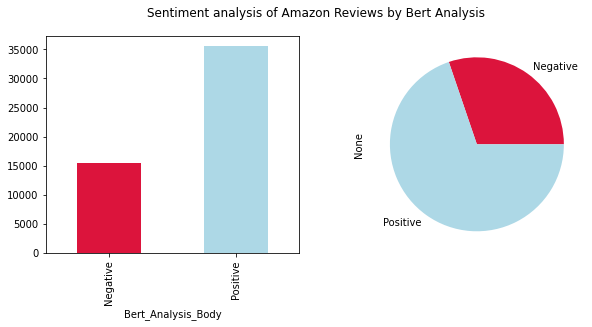

In [ ]:
# Visualizing the overall sentiment distribution
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Amazon Reviews by Bert Analysis")
 
# Grouping the data
GroupedData=review_df.groupby('Bert_Analysis_Body').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue'])

len(review_df[review_df["Bert_Analysis_Body"]=="Positive"]),len(review_df[review_df["Bert_Analysis_Body"]=="Negative"])

(33844, 14168, 3005)

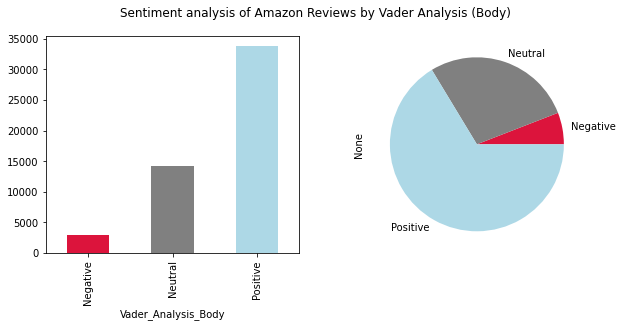

In [ ]:

fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Amazon Reviews by Vader Analysis (Body)")
 
# Grouping the data
GroupedData=review_df.groupby('Vader_Analysis_Body').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson','grey', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','grey', 'lightblue'])

#sentiment distribution by vader (body)
len(review_df[review_df["Vader_Analysis_Body"]=="Positive"]),len(review_df[review_df["Vader_Analysis_Body"]=="Neutral"]),len(review_df[review_df["Vader_Analysis_Body"]=="Negative"])

(13206, 36576, 1235)

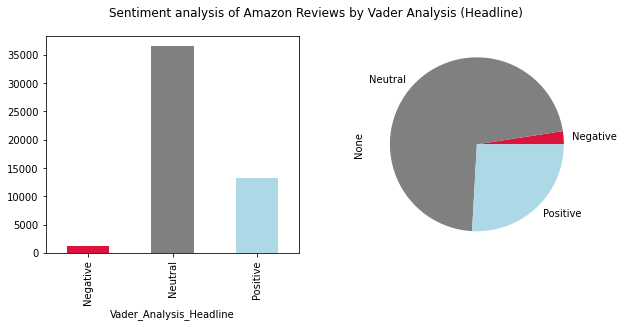

In [ ]:
#sentiment distribution by vader (headline)
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Amazon Reviews by Vader Analysis (Headline)")
 
# Grouping the data
GroupedData=review_df.groupby('Vader_Analysis_Headline').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson','grey', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','grey', 'lightblue'])

#sentiment distribution by vader (headline)
len(review_df[review_df["Vader_Analysis_Headline"]=="Positive"]),len(review_df[review_df["Vader_Analysis_Headline"]=="Neutral"]),len(review_df[review_df["Vader_Analysis_Headline"]=="Negative"])


(42252, 4830, 3935)

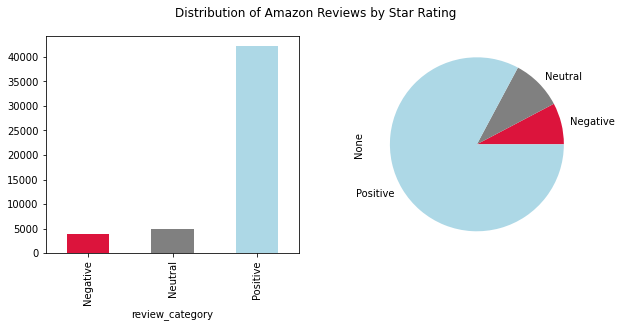

In [ ]:
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Distribution of Amazon Reviews by Star Rating")
 
# Grouping the data
GroupedData=review_df.groupby('review_category').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson','grey', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','grey', 'lightblue'])


#sentiment distribution by star rating
len(review_df[review_df["review_category"]=="Positive"]),len(review_df[review_df["review_category"]=="Neutral"]),len(review_df[review_df["review_category"]=="Negative"])

In [ ]:
#sentiment analysis with Textblob
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
   # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
review_df['textblob_subjectivity'] = review_df['review_body_clean_2'].apply(getSubjectivity)
review_df['textblob_polarity'] = review_df['review_body_clean_2'].apply(getPolarity)
review_df['textblob_sentiment'] = review_df['textblob_polarity'].apply(analysis)
review_df.head()

,review_body_clean_2,review_headline_clean,star_rating,review_category,word_count_body,word_count_headline,Vader_Sentiment_Body,Vader_Sentiment_Headline,Vader_Analysis_Body,Vader_Analysis_Headline,Bert_Analysis_Body,Bert_Sentiment_Body,textblob_subjectivity,textblob_polarity,textblob_sentiment
0,elmore leonard meet cast sierra madre quirky r...,quirky,4,Positive,24,1,0.1027,0.0,Neutral,Neutral,Positive,0.998419,1.0000,0.000000,Neutral
1,book interesting true story woman perpetrated ...,woman,4,Positive,47,5,0.2263,0.0,Neutral,Neutral,Positive,0.982911,0.7625,0.112500,Positive
2,opportunity review mary sleepy sheep julia dwe...,sleepy sheep rock,5,Positive,86,4,0.5267,0.0,Positive,Neutral,Negative,0.646574,0.7500,-0.210938,Negative
3,read book suspenseful twist steamy love story ...,steamy suspenseful,5,Positive,43,3,0.7506,0.0,Positive,Neutral,Positive,0.997282,0.8000,0.400000,Positive
4,barbarian need love short story work ebooks te...,barbarian,5,Positive,28,1,0.6369,0.0,Positive,Neutral,Negative,0.936816,0.4625,-0.050000,Negative


(41230, 3052, 6735)

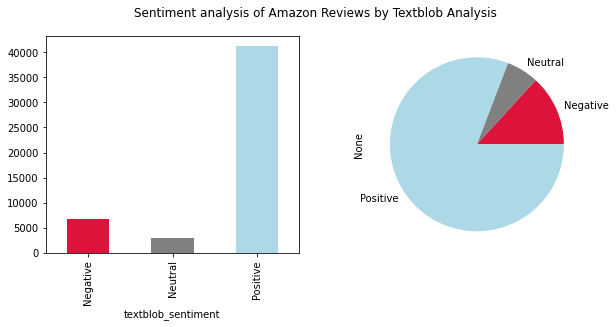

In [ ]:
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Amazon Reviews by Textblob Analysis")
 
# Grouping the data
GroupedData=review_df.groupby('textblob_sentiment').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson','grey', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','grey', 'lightblue'])


#sentiment distribution by star rating
len(review_df[review_df["textblob_sentiment"]=="Positive"]),len(review_df[review_df["textblob_sentiment"]=="Neutral"]),len(review_df[review_df["textblob_sentiment"]=="Negative"])

In [34]:
sentiment_label = {"Positive": 2,
            "Neutral": 1,
            "Negative": 0}

review_df["vader_label"] = review_df["Vader_Analysis_Body"].map(sentiment_label)
review_df["bert_label"] = review_df["Bert_Analysis_Body"].map(sentiment_label)
review_df["textblob_label"] = review_df["textblob_sentiment"].map(sentiment_label)

sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

review_df["star_rating_label"] = review_df["star_rating"].map(sentiment)

review_df.head()

,review_body_clean_2,review_headline_clean,star_rating,review_category,word_count_body,word_count_headline,Vader_Sentiment_Body,Vader_Sentiment_Headline,Vader_Analysis_Body,Vader_Analysis_Headline,Bert_Analysis_Body,Bert_Sentiment_Body,textblob_subjectivity,textblob_polarity,textblob_sentiment,vader_label,bert_label,textblob_label,star_rating_label
0,elmore leonard meet cast sierra madre quirky r...,quirky,4,Positive,24,1,0.1027,0.0,Neutral,Neutral,Positive,0.998419,1.0000,0.000000,Neutral,1,2,1,2
1,book interesting true story woman perpetrated ...,woman,4,Positive,47,5,0.2263,0.0,Neutral,Neutral,Positive,0.982911,0.7625,0.112500,Positive,1,2,2,2
2,opportunity review mary sleepy sheep julia dwe...,sleepy sheep rock,5,Positive,86,4,0.5267,0.0,Positive,Neutral,Negative,0.646574,0.7500,-0.210938,Negative,2,0,0,2
3,read book suspenseful twist steamy love story ...,steamy suspenseful,5,Positive,43,3,0.7506,0.0,Positive,Neutral,Positive,0.997282,0.8000,0.400000,Positive,2,2,2,2
4,barbarian need love short story work ebooks te...,barbarian,5,Positive,28,1,0.6369,0.0,Positive,Neutral,Negative,0.936816,0.4625,-0.050000,Negative,2,0,0,2


Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [ ]:
# building tfidf matrix to train models 
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer =TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# X = vectorizer.fit_transform(review_df["review_body_clean_2"])
# y = review_df["star_rating"]

In [37]:
X = review_df[["vader_label","bert_label","textblob_label"]]
y = review_df["star_rating_label"]
X.head()


,vader_label,bert_label,textblob_label
0,1,2,1
1,1,2,2
2,2,0,0
3,2,2,2
4,2,0,0


In [52]:
 review_df[["star_rating_label","vader_label","bert_label","textblob_label"]].head()

,star_rating_label,vader_label,bert_label,textblob_label
0,2,1,2,1
1,2,1,2,2
2,2,2,0,0
3,2,2,2,2
4,2,2,0,0


In [38]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: star_rating_label, dtype: int64

In [39]:
from collections import Counter
print(f'Original dataset shape : {Counter(y)}')
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 42252, 1: 4830, 0: 3935})
Resampled dataset shape Counter({2: 42252, 1: 42252, 0: 42252})


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1234)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1234)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.5368018302303565
Train accuracy 0.534633742258688


In [42]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))


Classification Report(Train)
              precision    recall  f1-score   support

           0       0.55      0.66      0.60     33791
           1       0.42      0.18      0.25     33808
           2       0.56      0.77      0.64     33805

    accuracy                           0.53    101404
   macro avg       0.51      0.53      0.50    101404
weighted avg       0.51      0.53      0.50    101404

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      8461
           1       0.41      0.18      0.25      8444
           2       0.56      0.77      0.65      8447

    accuracy                           0.54     25352
   macro avg       0.51      0.54      0.50     25352
weighted avg       0.51      0.54      0.50     25352



Very low F1 score for the test data set for the undersampled data sets. We'll try with the Randm Forest algorithm again.

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1234)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.537235721047649
Train accuracy 0.5362707585499585


In [44]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.56      0.65      0.60     33791
           1       0.41      0.20      0.27     33808
           2       0.56      0.76      0.64     33805

    accuracy                           0.54    101404
   macro avg       0.51      0.54      0.51    101404
weighted avg       0.51      0.54      0.51    101404

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.56      0.65      0.61      8461
           1       0.41      0.20      0.27      8444
           2       0.56      0.75      0.64      8447

    accuracy                           0.54     25352
   macro avg       0.51      0.54      0.51     25352
weighted avg       0.51      0.54      0.51     25352



In [45]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.3675055222467655
Train accuracy 0.3650644944972585


In [46]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.42      0.47      0.44     33791
           1       0.33      0.58      0.42     33808
           2       0.46      0.05      0.09     33805

    accuracy                           0.37    101404
   macro avg       0.40      0.37      0.32    101404
weighted avg       0.40      0.37      0.32    101404

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      8461
           1       0.33      0.58      0.42      8444
           2       0.45      0.05      0.09      8447

    accuracy                           0.37     25352
   macro avg       0.40      0.37      0.32     25352
weighted avg       0.40      0.37      0.32     25352



In [47]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.5295045755758915
Train accuracy 0.5254230602343103


In [48]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.61      0.46      0.53     33791
           1       0.40      0.38      0.39     33808
           2       0.57      0.73      0.64     33805

    accuracy                           0.53    101404
   macro avg       0.53      0.53      0.52    101404
weighted avg       0.53      0.53      0.52    101404

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.63      0.47      0.54      8461
           1       0.40      0.38      0.39      8444
           2       0.57      0.73      0.64      8447

    accuracy                           0.53     25352
   macro avg       0.53      0.53      0.52     25352
weighted avg       0.53      0.53      0.52     25352



In [49]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.537235721047649
Train accuracy 0.5362707585499585


In [50]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.56      0.65      0.60     33791
           1       0.41      0.20      0.27     33808
           2       0.56      0.76      0.64     33805

    accuracy                           0.54    101404
   macro avg       0.51      0.54      0.51    101404
weighted avg       0.51      0.54      0.51    101404

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.56      0.65      0.61      8461
           1       0.41      0.20      0.27      8444
           2       0.56      0.75      0.64      8447

    accuracy                           0.54     25352
   macro avg       0.51      0.54      0.51     25352
weighted avg       0.51      0.54      0.51     25352

